In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

In [2]:
import pandas as pd 
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv(r'C:\Users\acer\Desktop\314_abstract2.csv')
data

,abstract
0,"The paper reviews the existing and state-of-the-art computer-aided technologies and computational techniques, which can be applied to jewelry design and casting. A broad array of techniques are selected and ordered into three key parts: design; model-making; and casting, that outline the core of computer-aided jewelry design and casting. Computer-aided design and haptic technologies are surveyed in the purposes of supporting the design of jewelry and shape modeling. Rapid prototyping and..."
1,"At present, many projects embed smart LEDs ""multiple LEDs dynamically controlled by computers"" into clothes or accessories to support novel expressions or daily activities. However, most of them do not consider the ""sparkle"" of traditional jewelry. We propose a presentation technique for interactive jewelry called ""Sparklry"", which can present ""sparkles"" on a jewel stone using internal LEDs. These sparkles are designed by integrating (1) a traditional jewel, (2) a light shielding sheet with small slits, and (3) an LED array. We developed a prototype and several examples of jewelry to explore appropriate designs of slits and LED patterns. Moreover, we developed two prototypes."
2,"Tradition and modernity are the eternal topics of art, especially in the age of information.Efficient mechanical production methods to improve the traditional jewelry production process, which achieved the demand for mass production of jewelry.However, with the development of society and the progress of science and technology, many traditional arts and crafts are lost.From the traditional culture, this paper analyzes the work of embroidery jewelry by studying the traditional Chinese embroidery culture and technique, summarizes the traditional embroidery technology and modern jewelry design techniques combined approach to guide the creative practice.On the basis of studying the theoretical method of combining traditional embroidery technology with modern jewelry, this paper focuses on the application of traditional embroidery techniques in jewelry creation, inspire the potential of traditional craft, to provide reference for modern jewelry design rich Chinese characteristics and attract the attention of Chinese jewelry industry and inherit the traditional arts."
3,"Jewelry weaves into our everyday lives as no other wearable does. It comes in many wearable forms, is fashionable, and can adorn any part of the body. In this paper, through an exploratory, Research through Design (RtD) process, we tap into this vast potential space of input interaction that jewelry can enable. We do so by first identifying a small set of fundamental structural elements-called Jewelements-that any jewelry is composed of, and then defining their properties that enable the interaction. We leverage this synthesis along with observational data and literature to formulate a design space of jewelry-enabled input techniques. This work encapsulates both the extensions of common existing input methods (e.g., touch) as well as new ones inspired by jewelry. Furthermore, we discuss our prototypical sensor-based implementations. Through this work, we invite the community to engage in the conversation on how jewelry as a material can help shape wearable-based input."
4,"This study intended to determine the level of awareness by the Kelantan Jewellers House on how much is the impact of gold losses during the jewelry-making process to their business. The study focuses more on Kelantan State due to their popularity and existence of a chain of small and traditional craftsmen. Most local operators are still preserving the traditional way of fabrication and production techniques, tools, methods whilst maintaining the Malay aesthetic value in all aspects of fabrication. This unique value proposition inherited from their legacy lineage was taught throughout the generations and now adopted by the younger craftsmen in rank. Ironically, the manual process and traditional fabrication techn

In [4]:
stop = stopwords.words('english') + ["sustainable","jewelry","materials","research","material","jewellery","study","sustainability","technique","design","technology","paper","review"]
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII', 'ignore').decode('ASCII')
    return word

In [6]:
def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text

In [7]:
#lemmatize the text
data['abstract'] = data['abstract'].apply(remove_encoding_text)

In [8]:
text = ' '.join(words for words in data['abstract'])
len(text)

161663

In [9]:
lemma = WordNetLemmatizer().lemmatize
lemma('leaves')

'leaf'

In [10]:
#fit into the tf-idf model
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens

In [11]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((1,1)), stop_words = stop, strip_accents = 'unicode')

In [12]:
tdm = vectorizer.fit_transform(data['abstract'])

c:\Users\acer\Documents\Python Scripts\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  % sorted(inconsistent)


In [13]:
vectorizer.vocabulary_.items()

dict_items([('existing', 1207), ('computational', 604), ('applied', 165), ('broad', 382), ('array', 191), ('selected', 2877), ('ordered', 2247), ('three', 3246), ('outline', 2273), ('core', 719), ('haptic', 1500), ('surveyed', 3155), ('purpose', 2568), ('supporting', 3148), ('shape', 2914), ('rapid', 2597), ('prototyping', 2545), ('many', 1974), ('project', 2517), ('embed', 1063), ('smart', 2978), ('led', 1871), ('dynamically', 1008), ('controlled', 702), ('clothes', 524), ('accessory', 23), ('support', 3145), ('novel', 2181), ('expression', 1242), ('daily', 795), ('consider', 642), ('traditional', 3284), ('propose', 2532), ('presentation', 2465), ('interactive', 1723), ('called', 409), ('present', 2464), ('jewel', 1795), ('stone', 3074), ('using', 3396), ('internal', 1736), ('sparkle', 3012), ('designed', 872), ('integrating', 1711), ('light', 1883), ('shielding', 2924), ('sheet', 2921), ('small', 2977), ('developed', 897), ('prototype', 2543), ('several', 2907), ('example', 1192), ('

In [14]:
#finally lets create the wordcloud. 
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [15]:
tfidf_weights[0:10]

[('existing', 1.2879978828600844),
 ('computational', 0.3039814007625044),
 ('applied', 1.4679725513833304),
 ('broad', 0.5129813074427709),
 ('array', 0.4455794934783097),
 ('selected', 0.8928771291185205),
 ('ordered', 0.36067332224074883),
 ('three', 1.863737275637813),
 ('outline', 0.4779802699658092),
 ('core', 0.875791679966583)]

In [16]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights))

(-0.5, 1499.5, 1199.5, -0.5)

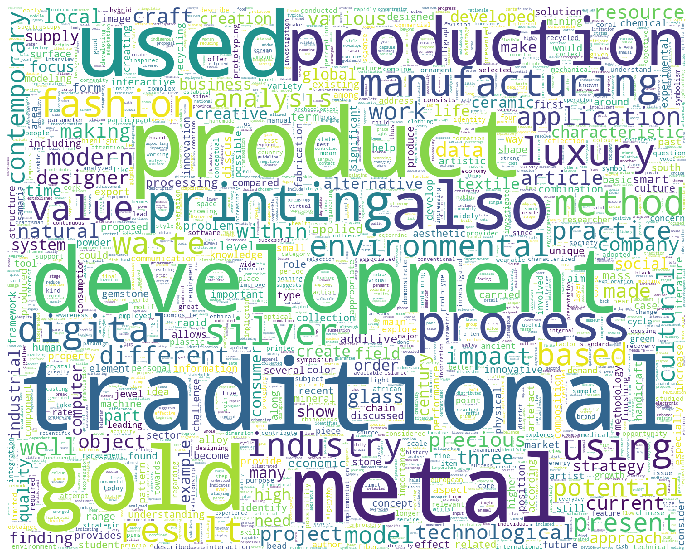

In [19]:
plt.figure(figsize=(15,10))
plt.imshow(w)
plt.axis('off')
#plt.savefig('wordcloud abstract.png')